In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
from math import sqrt
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN, Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Bidirectional,LSTM, Dense
from tensorflow.keras.layers import GRU,Dense
from keras.callbacks import EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data=pd.read_csv("C:/Users/kumar/Desktop/final7thsempr/andhra_pradesh.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Date                                              1301 non-null   object
 1   No. of Facilitator Registered                     1301 non-null   int64 
 2   No. of Sabha Scheduled                            1301 non-null   int64 
 3   No. of Facilitator Feedback Submitted             1301 non-null   int64 
 4   No. of Panchayats with Sabha Images               1301 non-null   int64 
 5   No. of Panchayats with Public Information Images  1301 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 61.1+ KB


In [4]:
print(data)

            Date  No. of Facilitator Registered  No. of Sabha Scheduled  \
0     01-09-2020                              0                       0   
1     02-09-2020                              2                       0   
2     03-09-2020                              2                       0   
3     04-09-2020                              2                       0   
4     05-09-2020                              2                       0   
...          ...                            ...                     ...   
1296  20-03-2024                          34809                   30735   
1297  21-03-2024                          34830                   30744   
1298  22-03-2024                          34850                   30758   
1299  23-03-2024                          34860                   30767   
1300  24-03-2024                          34861                   30768   

      No. of Facilitator Feedback Submitted  \
0                                         0   
1    

<Axes: xlabel='Date', ylabel='Values'>

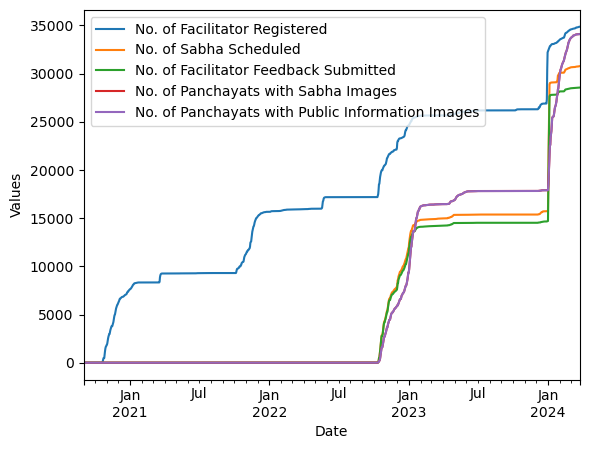

In [5]:
data['Date']=pd.to_datetime(data['Date'],format="%d-%m-%Y")
data.set_index('Date', inplace=True)
data.plot(ylabel='Values')

In [6]:
df=data.resample('H').interpolate(method='linear')
df.columns = ['c1','c2','c3','c4','c5']
print(df)

                               c1            c2            c3            c4  \
Date                                                                          
2020-09-01 00:00:00      0.000000      0.000000      0.000000      0.000000   
2020-09-01 01:00:00      0.083333      0.000000      0.000000      0.000000   
2020-09-01 02:00:00      0.166667      0.000000      0.000000      0.000000   
2020-09-01 03:00:00      0.250000      0.000000      0.000000      0.000000   
2020-09-01 04:00:00      0.333333      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
2024-03-23 20:00:00  34860.833333  30767.833333  28548.833333  34099.666667   
2024-03-23 21:00:00  34860.875000  30767.875000  28548.875000  34099.750000   
2024-03-23 22:00:00  34860.916667  30767.916667  28548.916667  34099.833333   
2024-03-23 23:00:00  34860.958333  30767.958333  28548.958333  34099.916667   
2024-03-24 00:00:00  34861.000000  30768.000000  285

In [7]:
zero_count_c1 = (df['c1'] == 0).sum()
zero_count_c2 = (df['c2'] == 0).sum()
print(zero_count_c1)
print(zero_count_c2)

1
18241


In [8]:
df_c1=df['c1'][zero_count_c1:]
df_c2=df['c2'][zero_count_c2:]

c1

In [9]:
print(df_c1)

Date
2020-09-01 01:00:00        0.083333
2020-09-01 02:00:00        0.166667
2020-09-01 03:00:00        0.250000
2020-09-01 04:00:00        0.333333
2020-09-01 05:00:00        0.416667
                           ...     
2024-03-23 20:00:00    34860.833333
2024-03-23 21:00:00    34860.875000
2024-03-23 22:00:00    34860.916667
2024-03-23 23:00:00    34860.958333
2024-03-24 00:00:00    34861.000000
Freq: H, Name: c1, Length: 31200, dtype: float64


<Axes: xlabel='Date', ylabel='values'>

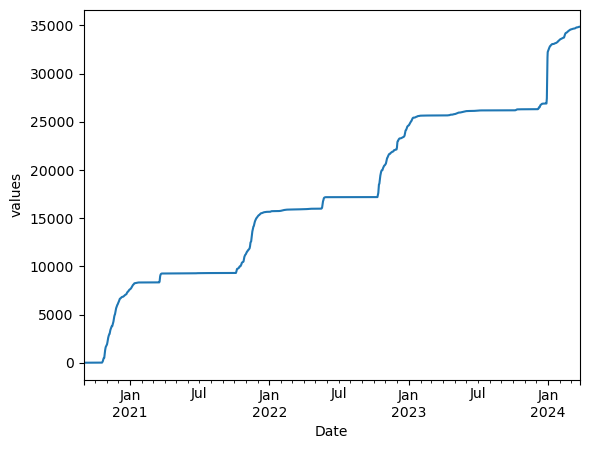

In [10]:
df_c1.plot(ylabel="values")

In [11]:
df_c1.describe()

count    31200.000000
mean     17534.037516
std       8796.969448
min          0.083333
25%       9302.000000
50%      17184.000000
75%      25825.270833
max      34861.000000
Name: c1, dtype: float64

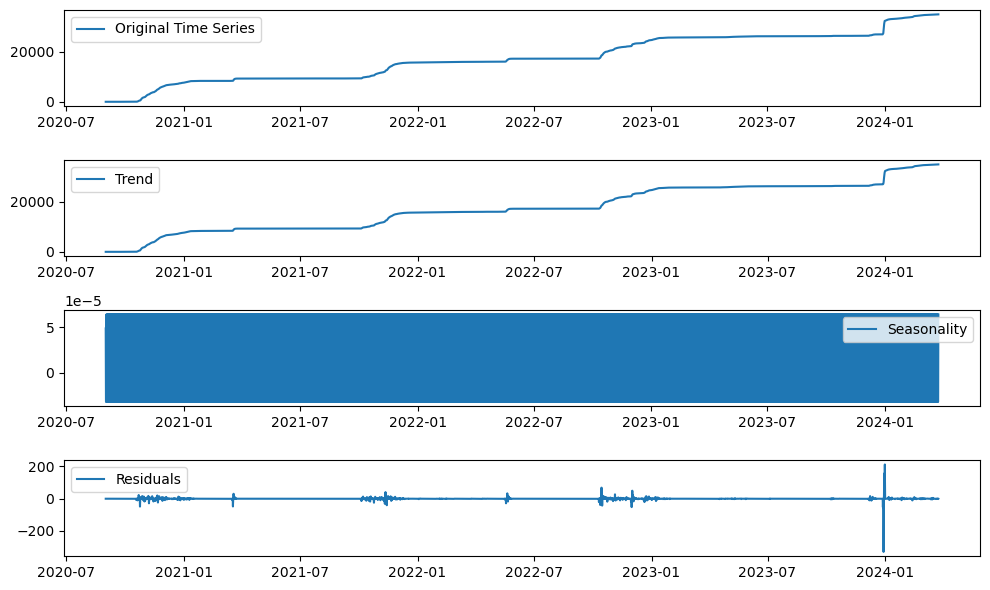

In [12]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_c1, model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df_c1, label='Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_c1)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.5781991024914246
p-value: 0.8758324381719793


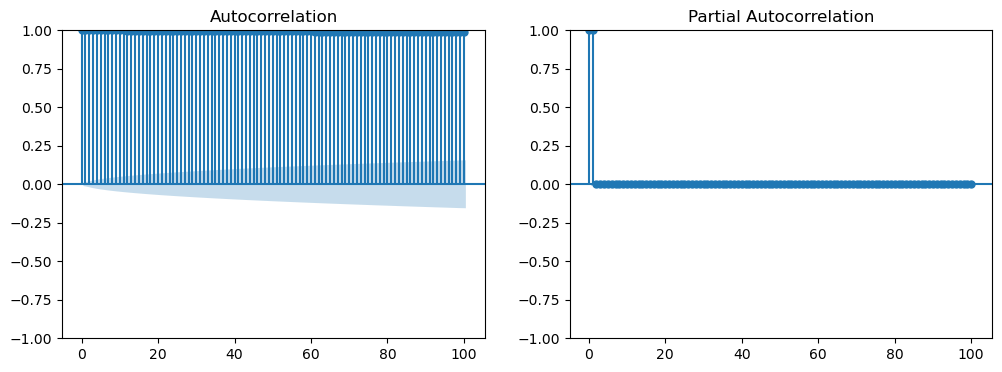

In [14]:
# Plot Autocorrelation and Partial Autocorrelation Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_c1, lags=100, ax=ax1)
plot_pacf(df_c1, lags=100, ax=ax2)
plt.show()

In [15]:
df_c1_diff=df_c1.diff(periods=1).dropna()

In [16]:
print(df_c1_diff)

Date
2020-09-01 02:00:00    0.083333
2020-09-01 03:00:00    0.083333
2020-09-01 04:00:00    0.083333
2020-09-01 05:00:00    0.083333
2020-09-01 06:00:00    0.083333
                         ...   
2024-03-23 20:00:00    0.041667
2024-03-23 21:00:00    0.041667
2024-03-23 22:00:00    0.041667
2024-03-23 23:00:00    0.041667
2024-03-24 00:00:00    0.041667
Freq: H, Name: c1, Length: 31199, dtype: float64


<Axes: xlabel='Date', ylabel='Diff Values'>

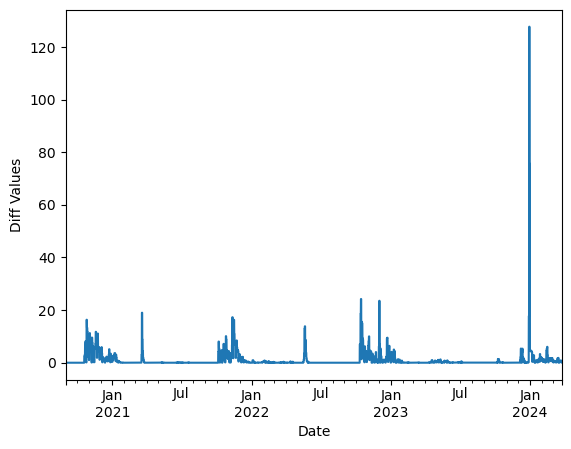

In [17]:
df_c1_diff.plot(ylabel="Diff Values")

In [18]:
df_c1_diff.describe()

count    31199.000000
mean         1.117373
std          4.781029
min          0.000000
25%          0.000000
50%          0.000000
75%          0.541667
max        127.708333
Name: c1, dtype: float64

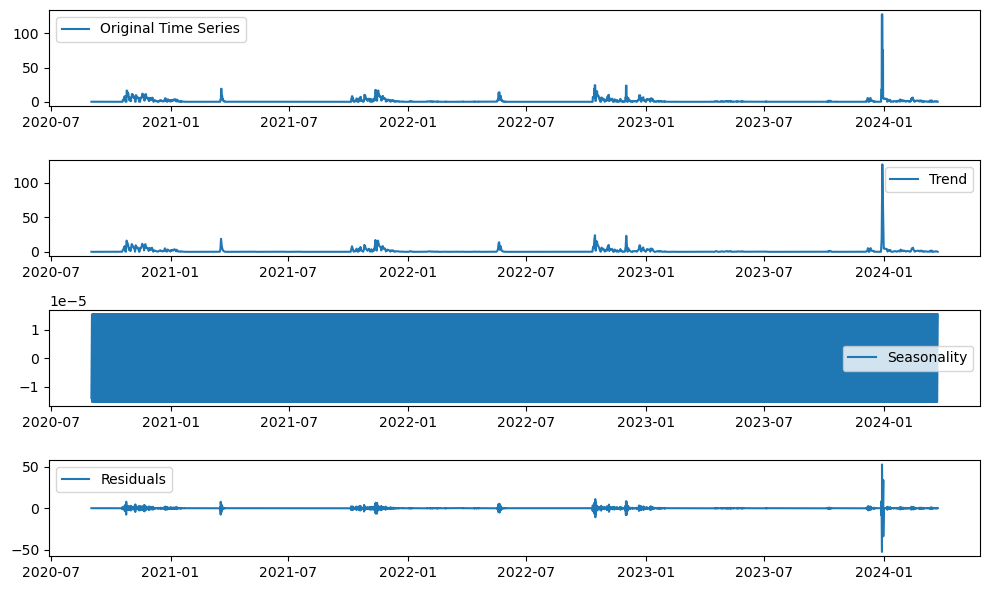

In [19]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_c1_diff, model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df_c1_diff, label='Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_c1_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -13.364001760438848
p-value: 5.358135808013508e-25


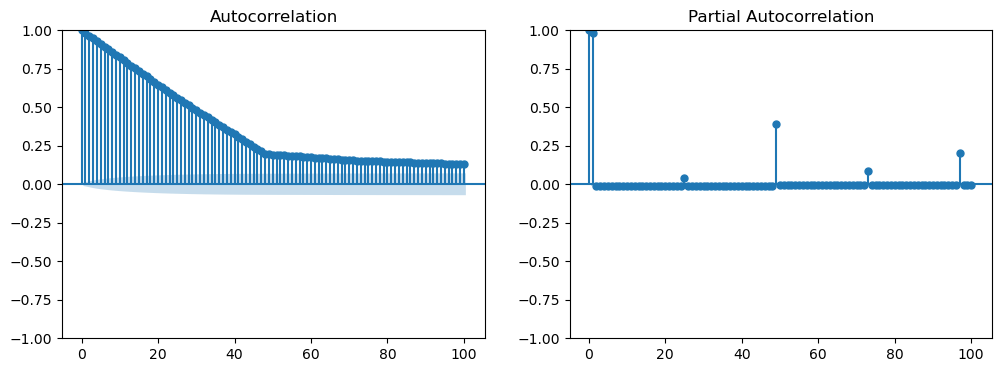

In [21]:
# Plot Autocorrelation and Partial Autocorrelation Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_c1_diff, lags=100, ax=ax1)
plot_pacf(df_c1_diff, lags=100, ax=ax2)
plt.show()

In [22]:
df_c1_diff_v=df_c1_diff.values

In [23]:
sequence_length = 100
evalue=200

In [24]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_data_scaled = scaler.fit_transform(df_c1_diff_v.reshape(-1, 1))

# Define sequence length
sequence_length = 100

# Create sequences for training
X, y = [], []
for i in range(len(ts_data_scaled) - sequence_length):
    X.append(ts_data_scaled[i:i + sequence_length])
    y.append(ts_data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

# Split the data into training, testing, and validation sets
# Train split: 60%, Test split: 20%, Validation split: 20%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Reshape the data for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(18659, 100, 1)
(6220, 100, 1)
(6220, 100, 1)


In [26]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the RNN model
model_rnn_c1 = Sequential()
model_rnn_c1.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length,1)))
model_rnn_c1.add(Dense(1))
model_rnn_c1.compile(optimizer='adam', loss='mse')
print("RNN\n")
model_rnn_c1.summary()
print("\n")

# Train the model with early stopping
history_model_rnn_c1 = model_rnn_c1.fit(X_train, y_train, 
                                        epochs=evalue, 
                                        batch_size=32,
                                        validation_data=(X_val, y_val), 
                                        verbose=2,
                                        callbacks=[early_stopping])


RNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 11s - loss: 2.0853e-05 - val_loss: 2.9205e-04 - 11s/epoch - 20ms/step
Epoch 2/200
584/584 - 10s - loss: 1.4386e-05 - val_loss: 2.4483e-04 - 10s/epoch - 18ms/step
Epoch 3/200
584/584 - 10s - loss: 1.3913e-05 - val_loss: 2.3677e-04 - 10s/epoch - 17ms/step
Epoch 4/200
584/584 - 10s - loss: 1.3930e-05 - val_loss: 2.8794e-04 - 10s/epoch - 18ms/step
Epoch 5/200
584/584 - 10s - loss: 1.4008e

195/195 [==============================] - 2s 7ms/step


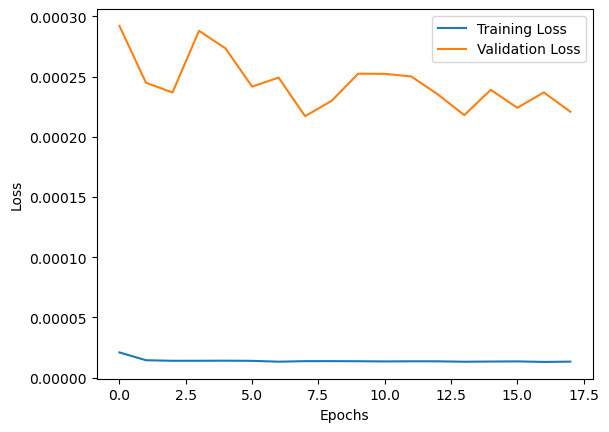

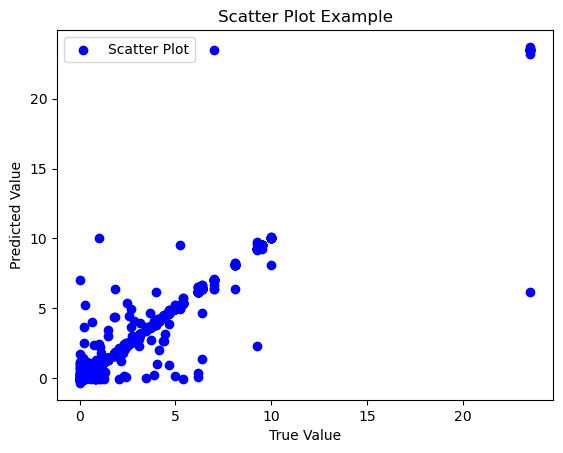

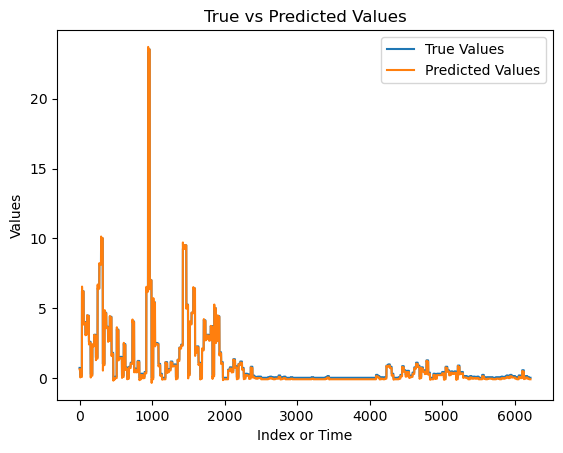

Performance on Different Metrics
RMSE: 0.4440633790765373
MAE: 0.12747708283863923
MSE: 0.19719228463687247
R2: 0.9605606013969462


In [27]:
# Make predictions on the test set
y_pred_scaled = model_rnn_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_rnn_c1 = {}
p_rnn_c1['RMSE'] = rmse
p_rnn_c1['MAE'] = mae
p_rnn_c1['MSE'] = mse
p_rnn_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_rnn_c1.history['loss'], label='Training Loss')
plt.plot(history_model_rnn_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_rnn_c1.items():
    print(f'{key}: {value}')

In [28]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the LSTM model
model_lstm_c1 = Sequential()
model_lstm_c1.add(LSTM(100, activation='relu', input_shape=(sequence_length,1)))
model_lstm_c1.add(Dense(1))
model_lstm_c1.compile(optimizer='adam', loss='mse')
print("LSTM\n")
model_lstm_c1.summary()
print("\n")

# Train the model with early stopping
history_model_lstm_c1 = model_lstm_c1.fit(X_train, y_train, 
                                          epochs=evalue, 
                                          batch_size=32,
                                          validation_data=(X_val, y_val), 
                                          verbose=2,
                                          callbacks=[early_stopping])


LSTM

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 35s - loss: 4.7504e-05 - val_loss: 4.4800e-04 - 35s/epoch - 59ms/step
Epoch 2/200
584/584 - 34s - loss: 2.3812e-05 - val_loss: 3.5201e-04 - 34s/epoch - 58ms/step
Epoch 3/200
584/584 - 34s - loss: 1.9530e-05 - val_loss: 2.8087e-04 - 34s/epoch - 58ms/step
Epoch 4/200
584/584 - 34s - loss: 1.7924e-05 - val_loss: 2.5554e-04 - 34s/epoch - 59ms/step
Epoch 5/200
584/584 - 34s - loss: 1.

195/195 [==============================] - 4s 17ms/step


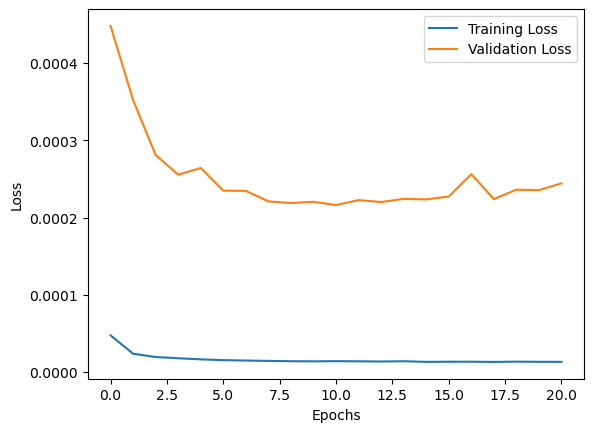

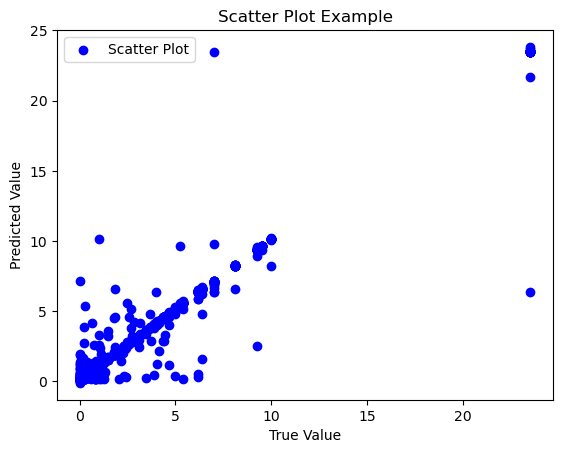

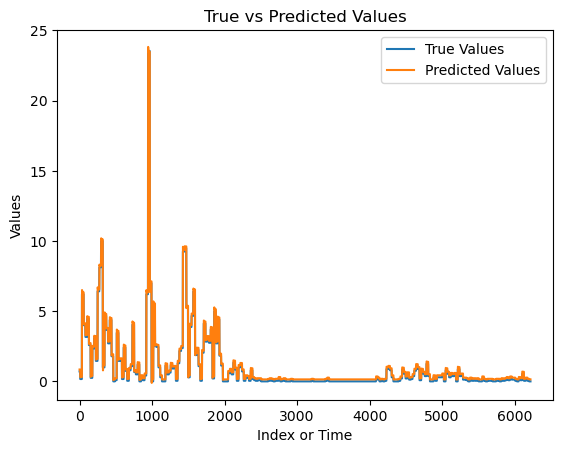

Performance on Different Metrics
RMSE: 0.4566664937543298
MAE: 0.17312332441199788
MSE: 0.20854428651787335
R2: 0.9582901468101865


In [29]:
# Make predictions on the test set
y_pred_scaled = model_lstm_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_lstm_c1 = {}
p_lstm_c1['RMSE'] = rmse
p_lstm_c1['MAE'] = mae
p_lstm_c1['MSE'] = mse
p_lstm_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_lstm_c1.history['loss'], label='Training Loss')
plt.plot(history_model_lstm_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_lstm_c1.items():
    print(f'{key}: {value}')

In [30]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the BiLSTM model
model_bilstm_c1 = Sequential()
model_bilstm_c1.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(sequence_length,1)))
model_bilstm_c1.add(Dense(1))
model_bilstm_c1.compile(optimizer='adam', loss='mse')
print("BiLSTM\n")
model_bilstm_c1.summary()
print("\n")

# Train the model with early stopping
history_model_bilstm_c1 = model_bilstm_c1.fit(X_train, y_train, 
                                              epochs=evalue, 
                                              batch_size=32,
                                              validation_data=(X_val, y_val), 
                                              verbose=2,
                                              callbacks=[early_stopping])


BiLSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               81600     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81801 (319.54 KB)
Trainable params: 81801 (319.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 43s - loss: 5.2140e-05 - val_loss: 4.5713e-04 - 43s/epoch - 74ms/step
Epoch 2/200
584/584 - 45s - loss: 2.4695e-05 - val_loss: 3.6066e-04 - 45s/epoch - 76ms/step
Epoch 3/200
584/584 - 46s - loss: 2.0407e-05 - val_loss: 3.9973e-04 - 46s/epoch - 79ms/step
Epoch 4/200
584/584 - 46s - loss: 1.7380e-05 - val_loss: 2.6

195/195 [==============================] - 4s 19ms/step


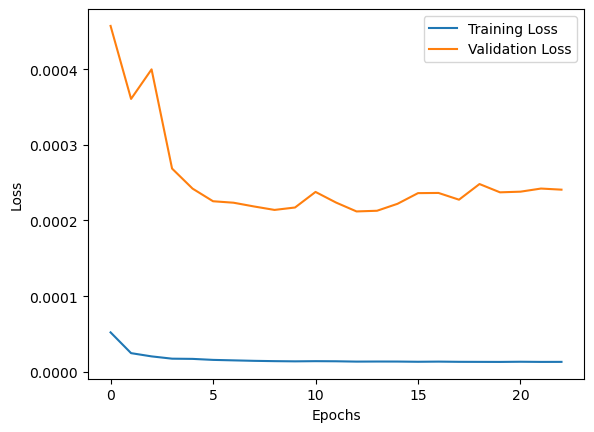

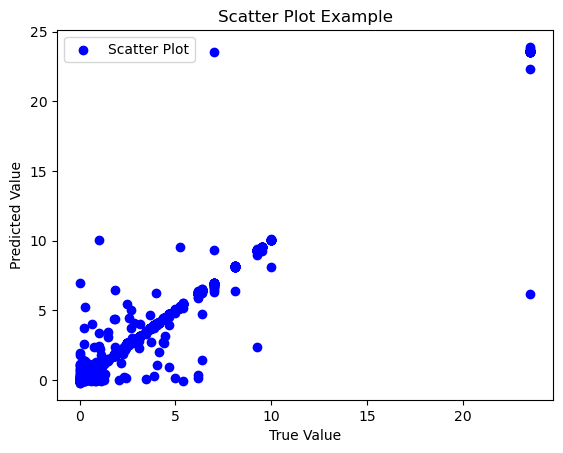

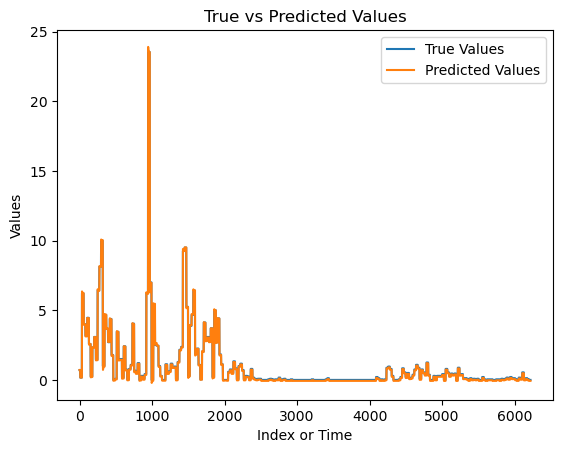

Performance on Different Metrics
RMSE: 0.44032070942397467
MAE: 0.0943960154503879
MSE: 0.19388232714763232
R2: 0.9612226087012263


In [31]:
# Make predictions on the test set
y_pred_scaled = model_bilstm_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_bilstm_c1 = {}
p_bilstm_c1['RMSE'] = rmse
p_bilstm_c1['MAE'] = mae
p_bilstm_c1['MSE'] = mse
p_bilstm_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_bilstm_c1.history['loss'], label='Training Loss')
plt.plot(history_model_bilstm_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_bilstm_c1.items():
    print(f'{key}: {value}')

In [32]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the GRU model
model_gru_c1 = Sequential()
model_gru_c1.add(GRU(100, activation='relu', input_shape=(sequence_length, 1)))
model_gru_c1.add(Dense(1))
model_gru_c1.compile(optimizer='adam', loss='mse')
print("GRU\n")
model_gru_c1.summary()
print("\n")

# Train the model with early stopping
history_model_gru_c1 = model_gru_c1.fit(X_train, y_train, 
                                        epochs=evalue, 
                                        batch_size=32,
                                        validation_data=(X_val, y_val), 
                                        verbose=2,
                                        callbacks=[early_stopping])


GRU

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               30900     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31001 (121.10 KB)
Trainable params: 31001 (121.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 31s - loss: 4.0080e-05 - val_loss: 5.9808e-04 - 31s/epoch - 52ms/step
Epoch 2/200
584/584 - 30s - loss: 1.7658e-05 - val_loss: 4.5595e-04 - 30s/epoch - 51ms/step
Epoch 3/200
584/584 - 30s - loss: 1.5534e-05 - val_loss: 4.2479e-04 - 30s/epoch - 51ms/step
Epoch 4/200
584/584 - 30s - loss: 1.4501e-05 - val_loss: 3.3807e-04 - 30s/epoch - 52ms/step
Epoch 5/200
584/584 - 30s - loss: 1.3

195/195 [==============================] - 3s 15ms/step


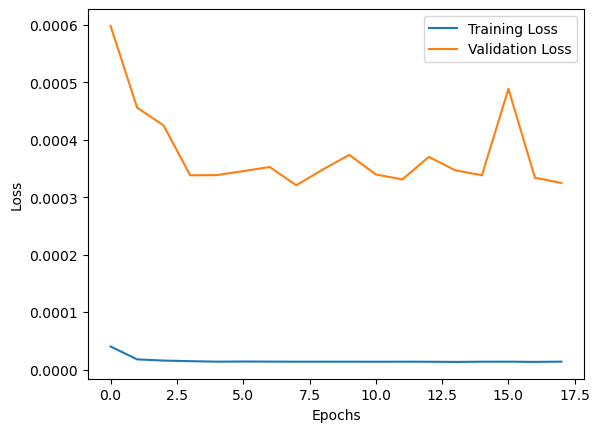

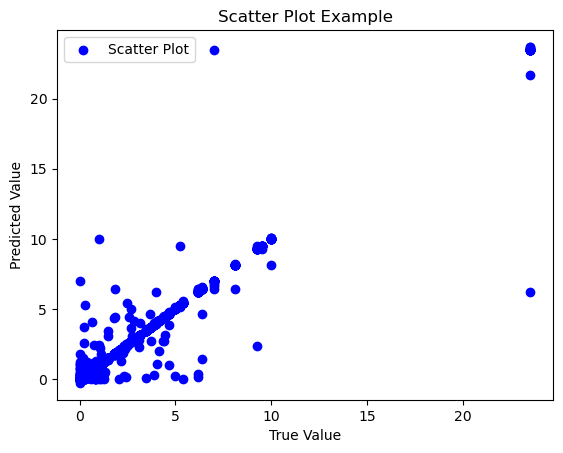

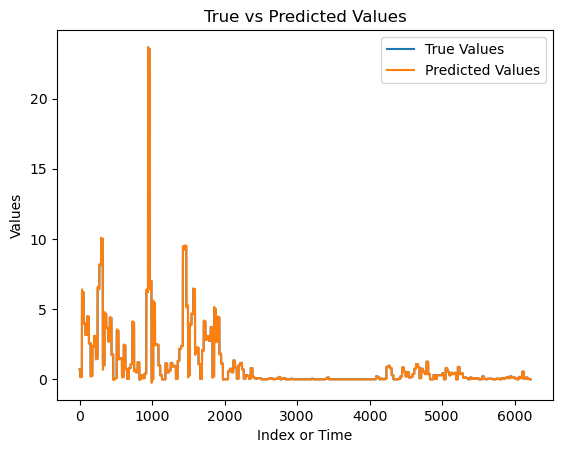

Performance on Different Metrics
RMSE: 0.4322927684342249
MAE: 0.043668487823763376
MSE: 0.1868770376405264
R2: 0.9626237000558365


In [33]:
# Make predictions on the test set
y_pred_scaled = model_gru_c1.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_gru_c1 = {}
p_gru_c1['RMSE'] = rmse
p_gru_c1['MAE'] = mae
p_gru_c1['MSE'] = mse
p_gru_c1['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_gru_c1.history['loss'], label='Training Loss')
plt.plot(history_model_gru_c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_gru_c1.items():
    print(f'{key}: {value}')

In [34]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-LSTM model
model_hybrid_rnn_lstm = Sequential()
model_hybrid_rnn_lstm.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_lstm.add(LSTM(100, activation='relu'))
model_hybrid_rnn_lstm.add(Dense(1))
model_hybrid_rnn_lstm.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-LSTM\n")
model_hybrid_rnn_lstm.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_lstm = model_hybrid_rnn_lstm.fit(X_train, y_train, 
                                                          epochs=evalue, 
                                                          batch_size=32,
                                                          validation_data=(X_val, y_val), 
                                                          verbose=2,
                                                          callbacks=[early_stopping])


Hybrid RNN-LSTM

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 90701 (354.30 KB)
Trainable params: 90701 (354.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 52s - loss: 3.9269e-05 - val_loss: 2.7875e-04 - 52s/epoch - 89ms/step
Epoch 2/200
584/584 - 50s - loss: 1.9059e-05 - val_loss: 2.3847e-04 - 50s/epoch - 85ms/step
Epoch 3/200
584/584 - 51s - loss: 1.6123e-05 - val_loss: 6.3451e-04 - 51s/epo

195/195 [==============================] - 5s 25ms/step


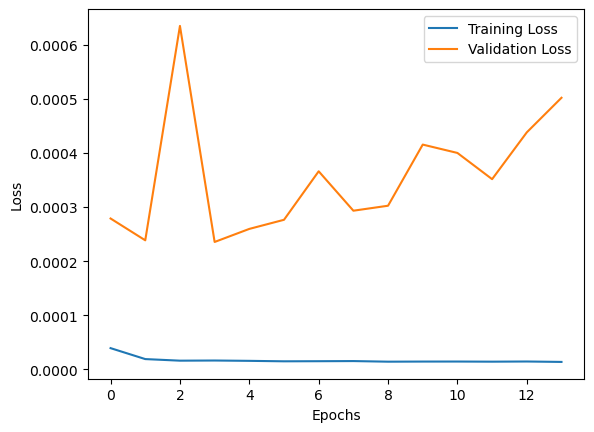

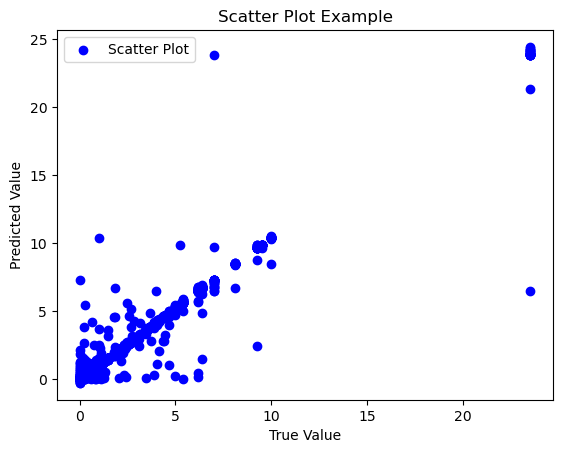

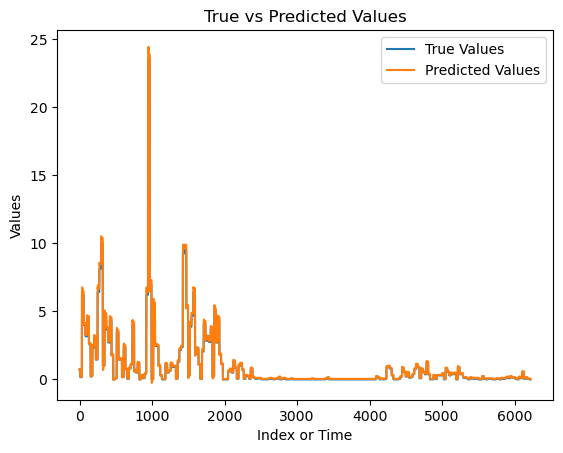

Performance on Different Metrics
RMSE: 0.4512101150912025
MAE: 0.10021855027529414
MSE: 0.20359056796061623
R2: 0.959280914177717


In [35]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_lstm = {}
p_hybrid_rnn_lstm['RMSE'] = rmse
p_hybrid_rnn_lstm['MAE'] = mae
p_hybrid_rnn_lstm['MSE'] = mse
p_hybrid_rnn_lstm['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_lstm.items():
    print(f'{key}: {value}')

In [36]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-BiLSTM model
model_hybrid_rnn_bilstm = Sequential()
model_hybrid_rnn_bilstm.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_bilstm.add(Bidirectional(LSTM(100, activation='relu')))
model_hybrid_rnn_bilstm.add(Dense(1))
model_hybrid_rnn_bilstm.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-BiLSTM\n")
model_hybrid_rnn_bilstm.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_bilstm = model_hybrid_rnn_bilstm.fit(X_train, y_train, 
                                                              epochs=evalue, 
                                                              batch_size=32,
                                                              validation_data=(X_val, y_val), 
                                                              verbose=2,
                                                              callbacks=[early_stopping])


Hybrid RNN-BiLSTM

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 171201 (668.75 KB)
Trainable params: 171201 (668.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 69s - loss: 3.5376e-05 - val_loss: 3.2587e-04 - 69s/epoch - 118ms/step
Epoch 2/200
584/584 - 68s - loss: 2.1604e-05 - val_loss: 2.7434e-04 - 68s/epoch - 117ms/step
Epoch

195/195 [==============================] - 6s 29ms/step


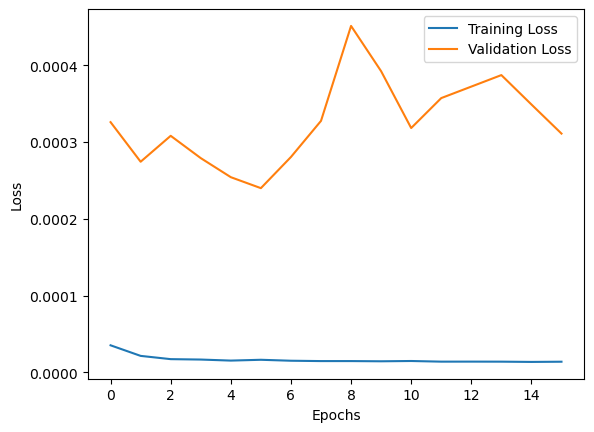

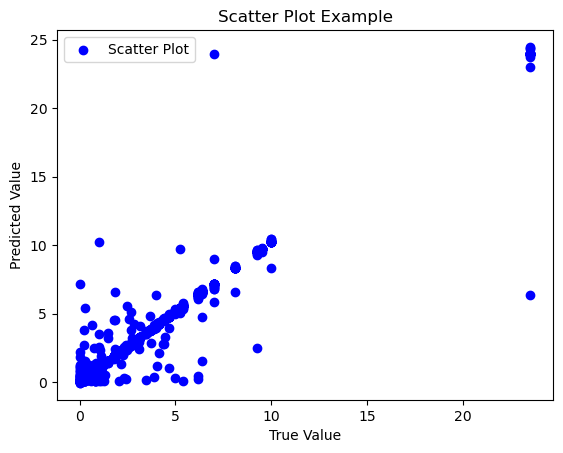

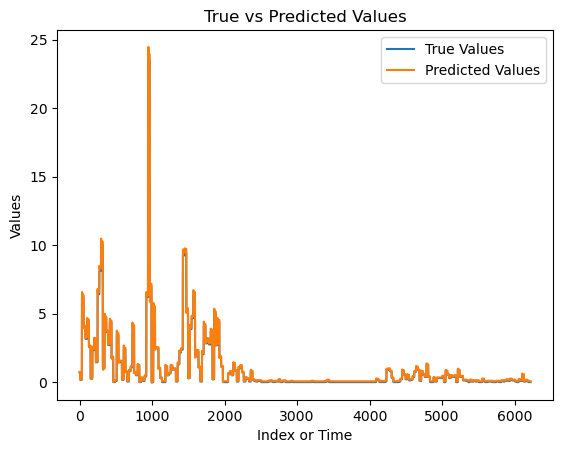

Performance on Different Metrics
RMSE: 0.4462997547386803
MAE: 0.10455456467839315
MSE: 0.1991834710798062
R2: 0.960162354599611


In [37]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_bilstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_bilstm = {}
p_hybrid_rnn_bilstm['RMSE'] = rmse
p_hybrid_rnn_bilstm['MAE'] = mae
p_hybrid_rnn_bilstm['MSE'] = mse
p_hybrid_rnn_bilstm['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_bilstm.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_bilstm.items():
    print(f'{key}: {value}')

In [38]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-GRU model
model_hybrid_rnn_gru = Sequential()
model_hybrid_rnn_gru.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_gru.add(GRU(100, activation='relu'))
model_hybrid_rnn_gru.add(Dense(1))
model_hybrid_rnn_gru.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-GRU\n")
model_hybrid_rnn_gru.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_gru = model_hybrid_rnn_gru.fit(X_train, y_train, 
                                                        epochs=evalue, 
                                                        batch_size=32,
                                                        validation_data=(X_val, y_val), 
                                                        verbose=2,
                                                        callbacks=[early_stopping])


Hybrid RNN-GRU

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 70901 (276.96 KB)
Trainable params: 70901 (276.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 47s - loss: 2.3276e-05 - val_loss: 2.6049e-04 - 47s/epoch - 80ms/step
Epoch 2/200
584/584 - 44s - loss: 1.5858e-05 - val_loss: 3.6789e-04 - 44s/epoch - 76ms/step
Epoch 3/200
584/584 - 45s - loss: 1.6712e-05 - val_loss: 2.1943e-04 - 45s/epoc

195/195 [==============================] - 4s 21ms/step


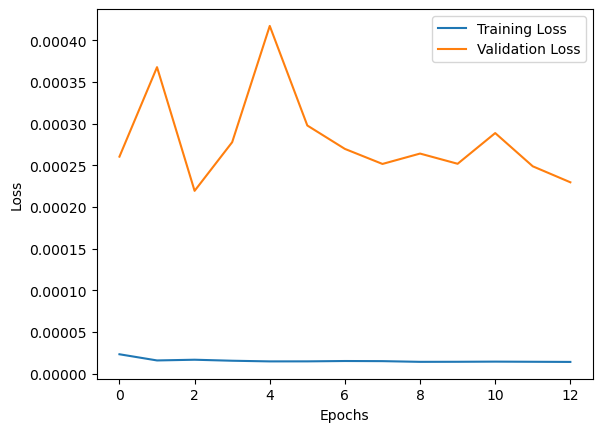

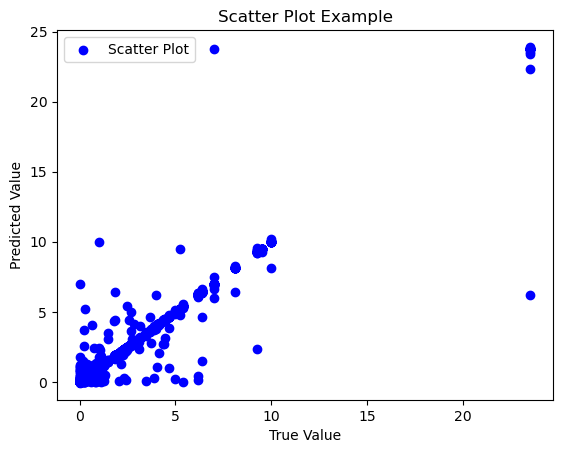

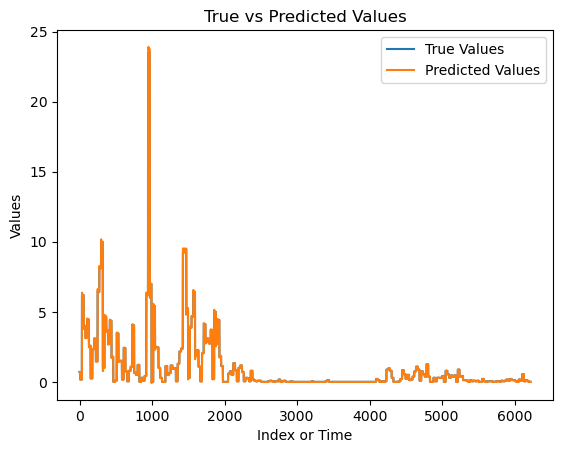

Performance on Different Metrics
RMSE: 0.43421289436230737
MAE: 0.04809712123948103
MSE: 0.1885408376304923
R2: 0.962290932112502


In [39]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_gru = {}
p_hybrid_rnn_gru['RMSE'] = rmse
p_hybrid_rnn_gru['MAE'] = mae
p_hybrid_rnn_gru['MSE'] = mse
p_hybrid_rnn_gru['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_gru.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_gru.items():
    print(f'{key}: {value}')

In [40]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid LSTM-BiLSTM model
model_hybrid_lstm_bilstm = Sequential()
model_hybrid_lstm_bilstm.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_lstm_bilstm.add(Bidirectional(LSTM(100, activation='relu')))
model_hybrid_lstm_bilstm.add(Dense(1))
model_hybrid_lstm_bilstm.compile(optimizer='adam', loss='mse')

print("Hybrid LSTM-BiLSTM\n")
model_hybrid_lstm_bilstm.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_lstm_bilstm = model_hybrid_lstm_bilstm.fit(X_train, y_train, 
                                                                epochs=evalue, 
                                                                batch_size=32,
                                                                validation_data=(X_val, y_val), 
                                                                verbose=2,
                                                                callbacks=[early_stopping])

Hybrid LSTM-BiLSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 100)          40800     
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 201801 (788.29 KB)
Trainable params: 201801 (788.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 88s - loss: 7.0184e-05 - val_loss: 5.6906e-04 - 88s/epoch - 151ms/step
Epoch 2/200
584/584 - 85s - loss: 2.9811e-05 - val_loss: 3.7052e-04 - 85s/epoch - 146ms/step
Epoc

195/195 [==============================] - 8s 37ms/step


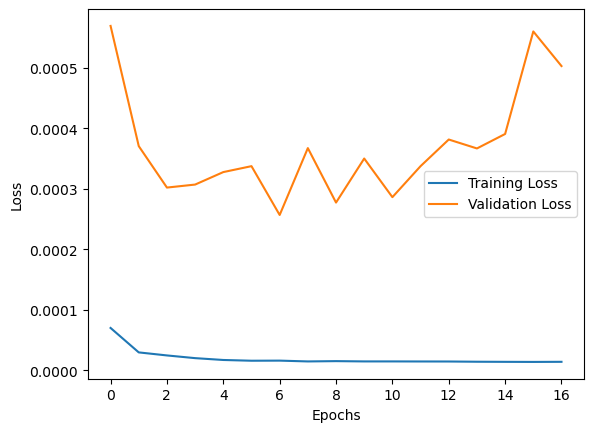

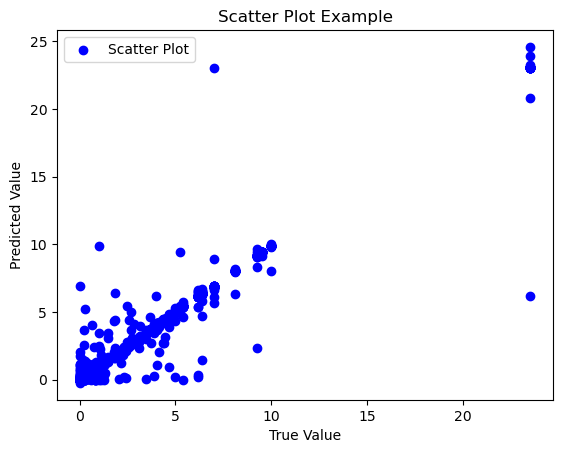

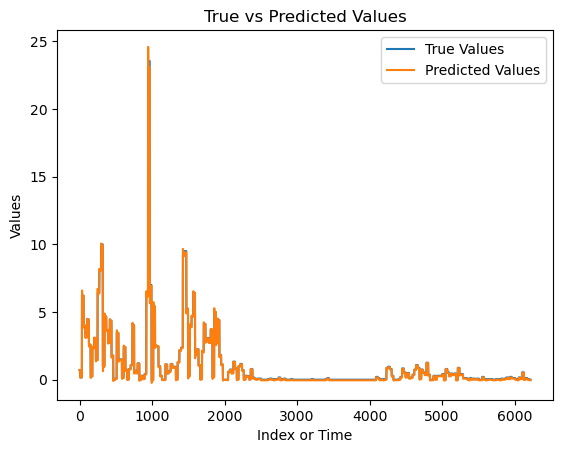

Performance on Different Metrics
RMSE: 0.43723748045651817
MAE: 0.07896809539823557
MSE: 0.1911766143159641
R2: 0.9617637641884711


In [41]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_lstm_bilstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_lstm_bilstm = {}
p_hybrid_lstm_bilstm['RMSE'] = rmse
p_hybrid_lstm_bilstm['MAE'] = mae
p_hybrid_lstm_bilstm['MSE'] = mse
p_hybrid_lstm_bilstm['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_lstm_bilstm.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_lstm_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_lstm_bilstm.items():
    print(f'{key}: {value}')

In [42]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid LSTM-GRU model
model_hybrid_lstm_gru = Sequential()
model_hybrid_lstm_gru.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_lstm_gru.add(GRU(100, activation='relu'))
model_hybrid_lstm_gru.add(Dense(1))
model_hybrid_lstm_gru.compile(optimizer='adam', loss='mse')

print("Hybrid LSTM-GRU\n")
model_hybrid_lstm_gru.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_lstm_gru = model_hybrid_lstm_gru.fit(X_train, y_train, 
                                                          epochs=evalue, 
                                                          batch_size=32,
                                                          validation_data=(X_val, y_val), 
                                                          verbose=2,
                                                          callbacks=[early_stopping])


Hybrid LSTM-GRU

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 100)          40800     
                                                                 
 gru_2 (GRU)                 (None, 100)               60600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 101501 (396.49 KB)
Trainable params: 101501 (396.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
584/584 - 70s - loss: 4.7045e-05 - val_loss: 4.4442e-04 - 70s/epoch - 121ms/step
Epoch 2/200
584/584 - 66s - loss: 2.3284e-05 - val_loss: 3.7012e-04 - 66s/epoch - 113ms/step
Epoch 3/200
584/584 - 65s - loss: 1.8202e-05 - val_loss: 2.4103e-04 - 65s

195/195 [==============================] - 6s 30ms/step


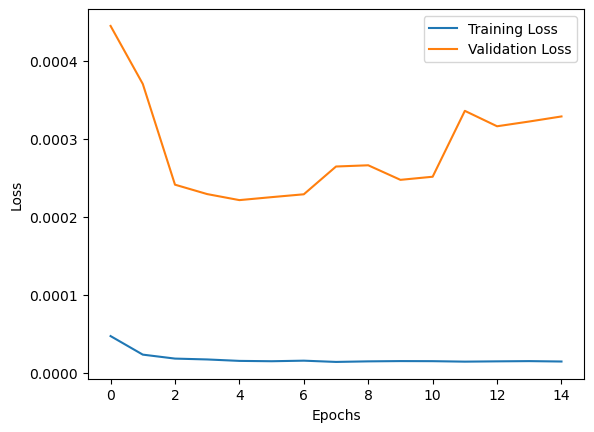

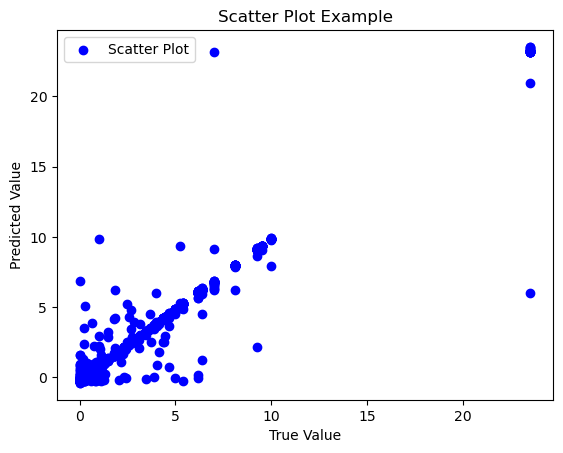

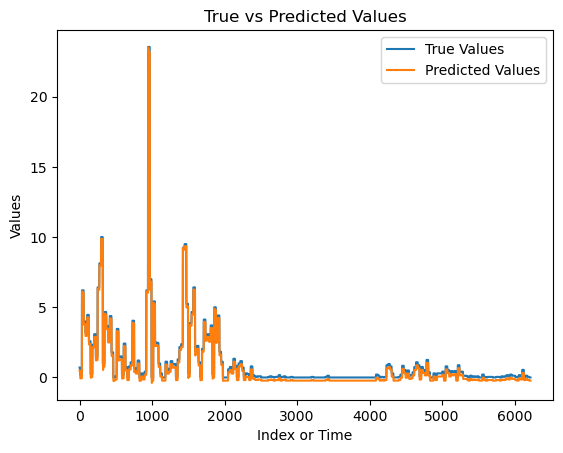

Performance on Different Metrics
RMSE: 0.4879662886517459
MAE: 0.2509642998855381
MSE: 0.23811109886055898
R2: 0.9523766431477474


In [43]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_lstm_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_lstm_gru = {}
p_hybrid_lstm_gru['RMSE'] = rmse
p_hybrid_lstm_gru['MAE'] = mae
p_hybrid_lstm_gru['MSE'] = mse
p_hybrid_lstm_gru['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_lstm_gru.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_lstm_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_lstm_gru.items():
    print(f'{key}: {value}')

In [44]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid BiLSTM-GRU model
model_hybrid_bilstm_gru = Sequential()
model_hybrid_bilstm_gru.add(Bidirectional(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True)))
model_hybrid_bilstm_gru.add(GRU(100, activation='relu'))
model_hybrid_bilstm_gru.add(Dense(1))
model_hybrid_bilstm_gru.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
history_model_hybrid_bilstm_gru = model_hybrid_bilstm_gru.fit(X_train, y_train, 
                                                              epochs=evalue, 
                                                              batch_size=32,
                                                              validation_data=(X_val, y_val), 
                                                              verbose=2,
                                                              callbacks=[early_stopping])


Epoch 1/200
584/584 - 87s - loss: 3.4831e-05 - val_loss: 3.3119e-04 - 87s/epoch - 150ms/step
Epoch 2/200
584/584 - 87s - loss: 1.8883e-05 - val_loss: 253.1480 - 87s/epoch - 149ms/step
Epoch 3/200
584/584 - 88s - loss: 341645.3438 - val_loss: 4.7058e-04 - 88s/epoch - 150ms/step
Epoch 4/200
584/584 - 87s - loss: 3.0403e-05 - val_loss: 3.5064e-04 - 87s/epoch - 150ms/step
Epoch 5/200
584/584 - 85s - loss: 2.4472e-05 - val_loss: 3.1012e-04 - 85s/epoch - 146ms/step
Epoch 6/200
584/584 - 85s - loss: 2.1439e-05 - val_loss: 2.7878e-04 - 85s/epoch - 146ms/step
Epoch 7/200
584/584 - 86s - loss: 1.9379e-05 - val_loss: 2.5625e-04 - 86s/epoch - 147ms/step
Epoch 8/200
584/584 - 87s - loss: 1.8138e-05 - val_loss: 2.4183e-04 - 87s/epoch - 148ms/step
Epoch 9/200
584/584 - 88s - loss: 1.7077e-05 - val_loss: 2.3569e-04 - 88s/epoch - 151ms/step
Epoch 10/200
584/584 - 88s - loss: 1.6416e-05 - val_loss: 2.2442e-04 - 88s/epoch - 150ms/step
Epoch 11/200
584/584 - 88s - loss: 1.5610e-05 - val_loss: 2.1946e-04 -

195/195 [==============================] - 8s 40ms/step


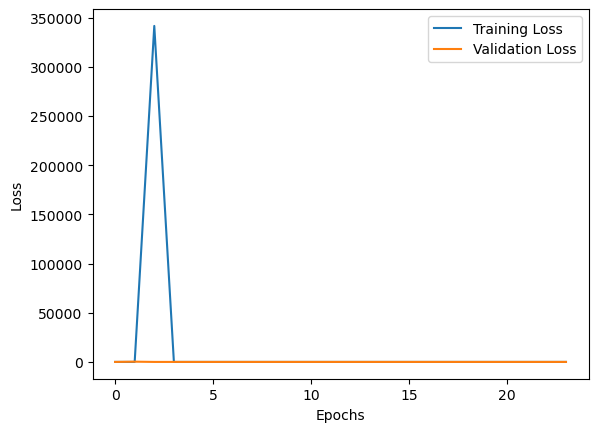

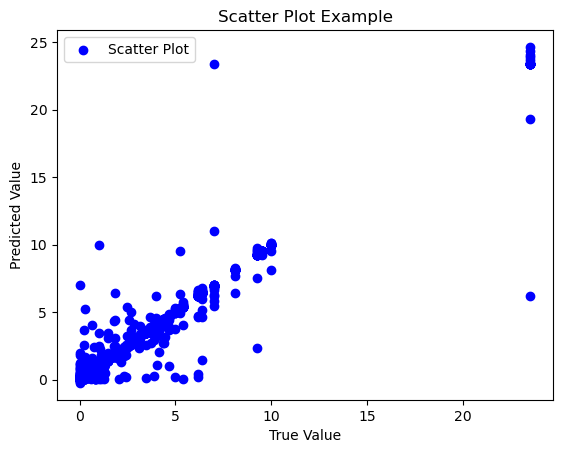

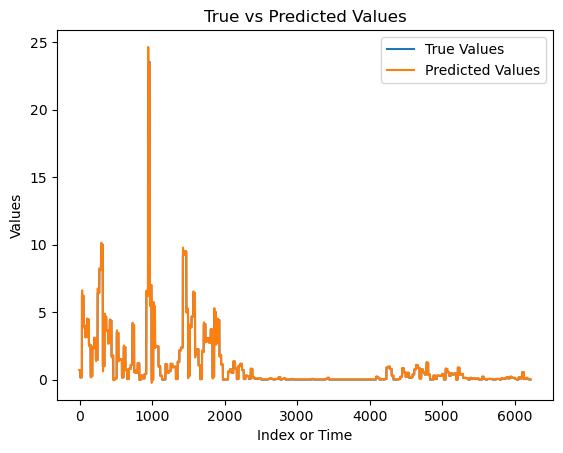

Performance on Different Metrics
RMSE: 0.44586666541513376
MAE: 0.057644361980301345
MSE: 0.1987970833284108
R2: 0.9602396339950532


In [45]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_bilstm_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_bilstm_gru = {}
p_hybrid_bilstm_gru['RMSE'] = rmse
p_hybrid_bilstm_gru['MAE'] = mae
p_hybrid_bilstm_gru['MSE'] = mse
p_hybrid_bilstm_gru['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_bilstm_gru.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_bilstm_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_bilstm_gru.items():
    print(f'{key}: {value}')

In [46]:
from prettytable import PrettyTable

# Create a PrettyTable object
p_table_c1 = PrettyTable()

# Define the table headers including MSE
p_table_c1.field_names = ["Model", "RMSE", "MAE", "MSE", "R2"]

# Add data to the table including MSE
p_table_c1.add_row(["RNN", p_rnn_c1['RMSE'], p_rnn_c1['MAE'], p_rnn_c1['MSE'], p_rnn_c1['R2']])
p_table_c1.add_row(["LSTM", p_lstm_c1['RMSE'], p_lstm_c1['MAE'], p_lstm_c1['MSE'], p_lstm_c1['R2']])
p_table_c1.add_row(["BiLSTM", p_bilstm_c1['RMSE'], p_bilstm_c1['MAE'], p_bilstm_c1['MSE'], p_bilstm_c1['R2']])
p_table_c1.add_row(["GRU", p_gru_c1['RMSE'], p_gru_c1['MAE'], p_gru_c1['MSE'], p_gru_c1['R2']])
p_table_c1.add_row(["Hybrid RNN-LSTM", p_hybrid_rnn_lstm['RMSE'], p_hybrid_rnn_lstm['MAE'], p_hybrid_rnn_lstm['MSE'], p_hybrid_rnn_lstm['R2']])
p_table_c1.add_row(["Hybrid RNN-BiLSTM", p_hybrid_rnn_bilstm['RMSE'], p_hybrid_rnn_bilstm['MAE'], p_hybrid_rnn_bilstm['MSE'], p_hybrid_rnn_bilstm['R2']])
p_table_c1.add_row(["Hybrid RNN-GRU", p_hybrid_rnn_gru['RMSE'], p_hybrid_rnn_gru['MAE'], p_hybrid_rnn_gru['MSE'], p_hybrid_rnn_gru['R2']])
p_table_c1.add_row(["Hybrid LSTM-BiLSTM", p_hybrid_lstm_bilstm['RMSE'], p_hybrid_lstm_bilstm['MAE'], p_hybrid_lstm_bilstm['MSE'], p_hybrid_lstm_bilstm['R2']])
p_table_c1.add_row(["Hybrid LSTM-GRU", p_hybrid_lstm_gru['RMSE'], p_hybrid_lstm_gru['MAE'], p_hybrid_lstm_gru['MSE'], p_hybrid_lstm_gru['R2']])
p_table_c1.add_row(["Hybrid BiLSTM-GRU", p_hybrid_bilstm_gru['RMSE'], p_hybrid_bilstm_gru['MAE'], p_hybrid_bilstm_gru['MSE'], p_hybrid_bilstm_gru['R2']])

# Set table properties (optional)
p_table_c1.align["Model"] = "l"  # Left-align the 'Model' column

# Print the table
print(p_table_c1)

+--------------------+---------------------+----------------------+---------------------+--------------------+
| Model              |         RMSE        |         MAE          |         MSE         |         R2         |
+--------------------+---------------------+----------------------+---------------------+--------------------+
| RNN                |  0.4440633790765373 | 0.12747708283863923  | 0.19719228463687247 | 0.9605606013969462 |
| LSTM               |  0.4566664937543298 | 0.17312332441199788  | 0.20854428651787335 | 0.9582901468101865 |
| BiLSTM             | 0.44032070942397467 |  0.0943960154503879  | 0.19388232714763232 | 0.9612226087012263 |
| GRU                |  0.4322927684342249 | 0.043668487823763376 |  0.1868770376405264 | 0.9626237000558365 |
| Hybrid RNN-LSTM    |  0.4512101150912025 | 0.10021855027529414  | 0.20359056796061623 | 0.959280914177717  |
| Hybrid RNN-BiLSTM  |  0.4462997547386803 | 0.10455456467839315  |  0.1991834710798062 | 0.960162354599611  |
|

In [47]:
# Define performance metrics for each model
models_metrics = {
    "RNN": {"RMSE": p_rnn_c1['RMSE'], "MAE": p_rnn_c1['MAE'], "MSE": p_rnn_c1['MSE'], "R2": p_rnn_c1['R2']},
    "LSTM": {"RMSE": p_lstm_c1['RMSE'], "MAE": p_lstm_c1['MAE'], "MSE": p_lstm_c1['MSE'], "R2": p_lstm_c1['R2']},
    "BiLSTM": {"RMSE": p_bilstm_c1['RMSE'], "MAE": p_bilstm_c1['MAE'], "MSE": p_bilstm_c1['MSE'], "R2": p_bilstm_c1['R2']},
    "GRU": {"RMSE": p_gru_c1['RMSE'], "MAE": p_gru_c1['MAE'], "MSE": p_gru_c1['MSE'], "R2": p_gru_c1['R2']},
    "Hybrid RNN-LSTM": {"RMSE": p_hybrid_rnn_lstm['RMSE'], "MAE": p_hybrid_rnn_lstm['MAE'], "MSE": p_hybrid_rnn_lstm['MSE'], "R2": p_hybrid_rnn_lstm['R2']},
    "Hybrid RNN-BiLSTM": {"RMSE": p_hybrid_rnn_bilstm['RMSE'], "MAE": p_hybrid_rnn_bilstm['MAE'], "MSE": p_hybrid_rnn_bilstm['MSE'], "R2": p_hybrid_rnn_bilstm['R2']},
    "Hybrid RNN-GRU": {"RMSE": p_hybrid_rnn_gru['RMSE'], "MAE": p_hybrid_rnn_gru['MAE'], "MSE": p_hybrid_rnn_gru['MSE'], "R2": p_hybrid_rnn_gru['R2']},
    "Hybrid LSTM-BiLSTM": {"RMSE": p_hybrid_lstm_bilstm['RMSE'], "MAE": p_hybrid_lstm_bilstm['MAE'], "MSE": p_hybrid_lstm_bilstm['MSE'], "R2": p_hybrid_lstm_bilstm['R2']},
    "Hybrid LSTM-GRU": {"RMSE": p_hybrid_lstm_gru['RMSE'], "MAE": p_hybrid_lstm_gru['MAE'], "MSE": p_hybrid_lstm_gru['MSE'], "R2": p_hybrid_lstm_gru['R2']},
    "Hybrid BiLSTM-GRU": {"RMSE": p_hybrid_bilstm_gru['RMSE'], "MAE": p_hybrid_bilstm_gru['MAE'], "MSE": p_hybrid_bilstm_gru['MSE'], "R2": p_hybrid_bilstm_gru['R2']}
}

# Define the weights for each metric (lower RMSE and MAE, higher R2 is better)
weights = {"RMSE": -1, "MAE": -1, "MSE": -1, "R2": 1}

# Calculate the score for each model
model_scores = {}
for model, metrics in models_metrics.items():
    score = 0
    for metric, value in metrics.items():
        score += value * weights[metric]
    model_scores[model] = score

# Sort the models based on their score
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Assign Friedman ranking to each model based on their sorted order
friedman_ranking = {}
for i, (model, _) in enumerate(sorted_models):
    friedman_ranking[model] = i + 1

# Print Friedman ranking of each model
print("Friedman Ranking:")
for model, rank in friedman_ranking.items():
    print(f"{model}: {rank}")

Friedman Ranking:
GRU: 1
Hybrid RNN-GRU: 2
Hybrid BiLSTM-GRU: 3
Hybrid LSTM-BiLSTM: 4
BiLSTM: 5
Hybrid RNN-BiLSTM: 6
Hybrid RNN-LSTM: 7
RNN: 8
LSTM: 9
Hybrid LSTM-GRU: 10


In [48]:
# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(models_metrics).T

# Save DataFrame to a CSV file
df_metrics.to_csv('andhra_pradesh_metrics_c1.csv')